# Main program GAIA-NIR

## Purpose

The main program handles the overall simulation flow by calling methods from the Spectrum and Parameters classes.\
The Spectrum class encapsulates all spectrum-related operations, including loading, processing, and saving the spectrum. \
The Parameters class handles configuration.


## Version History
- **v6.0**: Update: 

- Spectrum Convolution & Dirac Testing Improvements
- Separation of Convolution and Resampling


Last Edited: 2025-02-27


## Flowchart of first overview of program

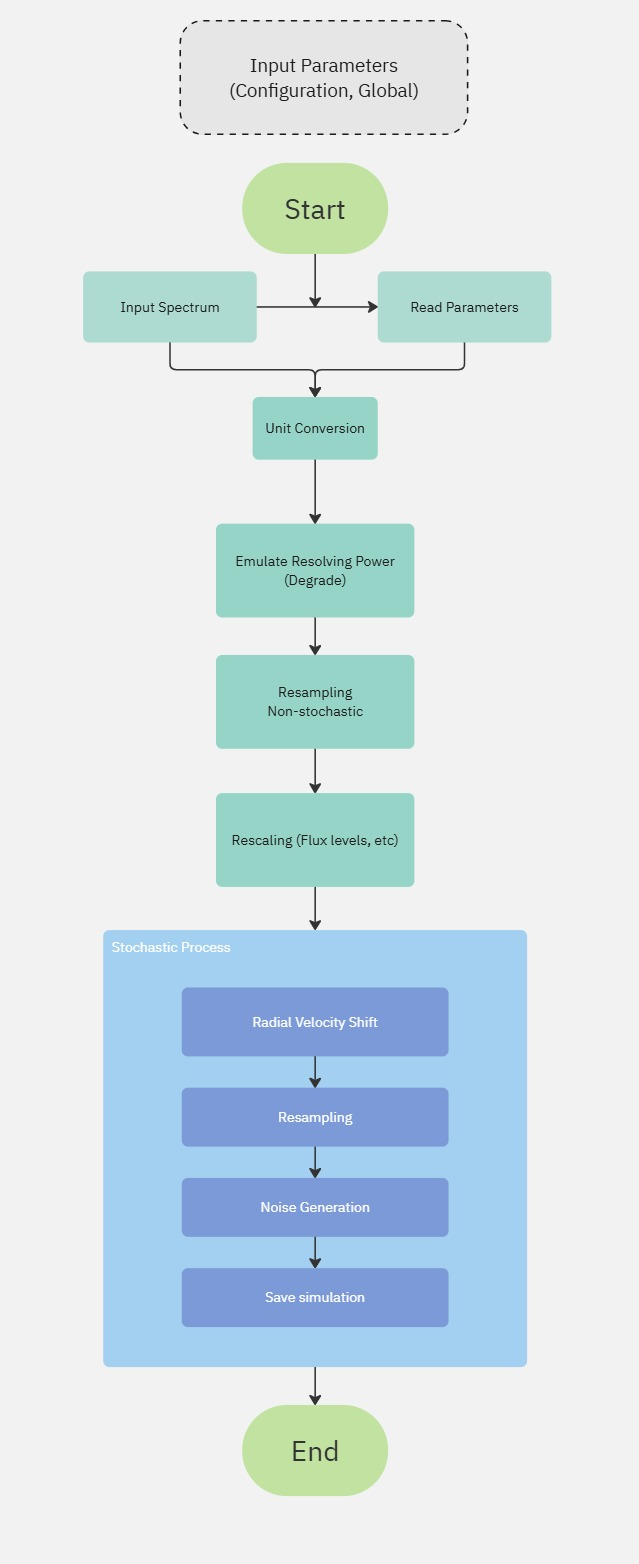

## Main program


In [1]:
import import_ipynb
import numpy as np
from spectrum import Spectrum
from parameters import Parameters


Initializing default parameters
Loading spectrum from dirac_spectrum.txt
Spectrum loaded correctly.
Sigma wavelength units: 5.0, pixel units: 4999.999762512754
Gaussian convolution completed.
Flux before & after convolution: 1.000 | 1.000
Flux conservation ratio: 1.000000


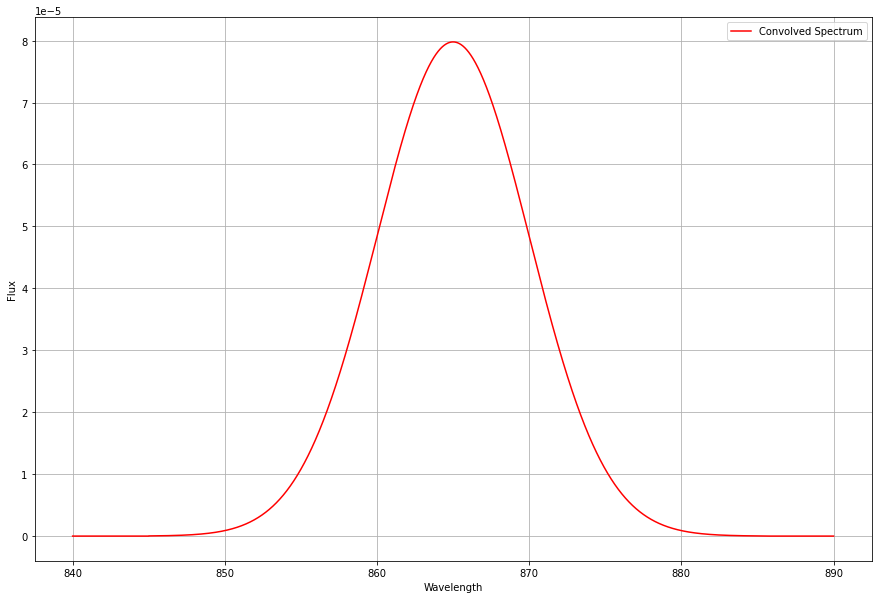

Applying radial velocity shift
Resampling spectrum for stochastic process
Adding noise to spectrum
Spectrum saved to Dirac_spectrum_001.txt
Simulation complete.


In [3]:
def main():
    """
    Main function to control the simulation flow.
    """
    params = Parameters()
    spectrum = Spectrum()

    
    spectrum.load_spectrum("dirac_spectrum.txt")
    
    original_spectrum = spectrum.copy()
    spectrum.convolve_spectrum().plot_comparison(reference_spectrum=original_spectrum, verbose=False)
    

    for i in range(params.num_output_spectra):
        spectrum.radial_velocity_shift(verbose=(i == 0))  
        spectrum.resample_stochastic(verbose=(i == 0))  
        spectrum.generate_noise(verbose=(i == 0))  
        spectrum.save_spectrum(output_file=f"Dirac_spectrum_{i+1:03d}.txt")

    print("Simulation complete.")

if __name__ == "__main__":
    main()
